In [1]:
import pandas as pd

In [2]:
comments=pd.read_csv("Comments.csv")
users=pd.read_csv("Users.csv")
posts=pd.read_csv("Posts.csv")

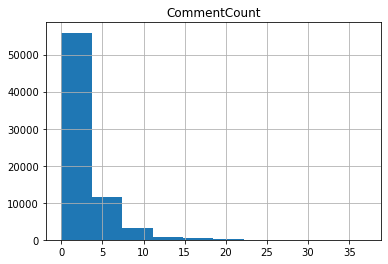

In [3]:
#Zadanie 1
hist=posts.hist('CommentCount')

In [4]:
#Zadanie 2
id=posts.groupby('OwnerUserId')\
                .sum('ViewCount')\
                .sort_values('ViewCount',ascending=False)\
                .reset_index()\
                .loc[0,'OwnerUserId']
users[users['Id']==id].loc[:,'DisplayName'].values[0]
# w ramce users jest zarówno AccountId jak i Id wiec w tym i nastepnym zadaniu nie bardzo wiadomo które,
# ale wybralem id bo wydaje sie mieć wiecej sensu

'Mark Mayo'

In [5]:
#Zadanie 3
id=posts[posts['Id'].isin(posts['AcceptedAnswerId'])][['OwnerUserId','Id']]\
                    .groupby('OwnerUserId')\
                    .count()\
                    .sort_values('Id',ascending=False)\
                    .reset_index()\
                    .loc[1,'OwnerUserId']
users[users['Id']==id].loc[:,'DisplayName'].values[0]

'jpatokal'

In [6]:
#Zadanie 4
accepted=posts[posts['Id'].isin(posts['AcceptedAnswerId'])][['Score','ParentId']]
max_score=posts[['ParentId','Score']]\
            .groupby('ParentId')\
            .max()\
            .reset_index()
answers=accepted.merge(max_score,left_on='ParentId',right_on='ParentId',suffixes=('_acc','_max'))
print(f"{len(answers[answers['Score_acc']<answers['Score_max']])/len(posts[posts['PostTypeId']==1])*100}%")

4.099266156395486%
